In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [227]:
pl=pd.read_csv(r'C:\Users\Akash Barwad\Documents\AIML\Bank_Personal_Loan_Modelling.csv')
pl1=pd.DataFrame(pl)

In [228]:
pl.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [229]:
## Dropped ZIp Code and ID column as they have no relevant information with respect to loan cases.

pl1=pl.drop('ZIP Code',axis=1)

In [230]:
pl2=pl1.drop('ID',axis=1)

In [231]:
## Calling for the Heads,shape and describe to check if database appearance.
pl2.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [232]:
pl2.shape

(5000, 12)

In [233]:
pl2.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### From the Above Describe function we get a an idea that "Income, CCavg and Mortgage" are not equally distributed for the normal curve function and we can see the outliers. lets check visually as well with null values, pair plot & Boxplot.


In [234]:
pl2.shape

(5000, 12)

In [235]:
pl2.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

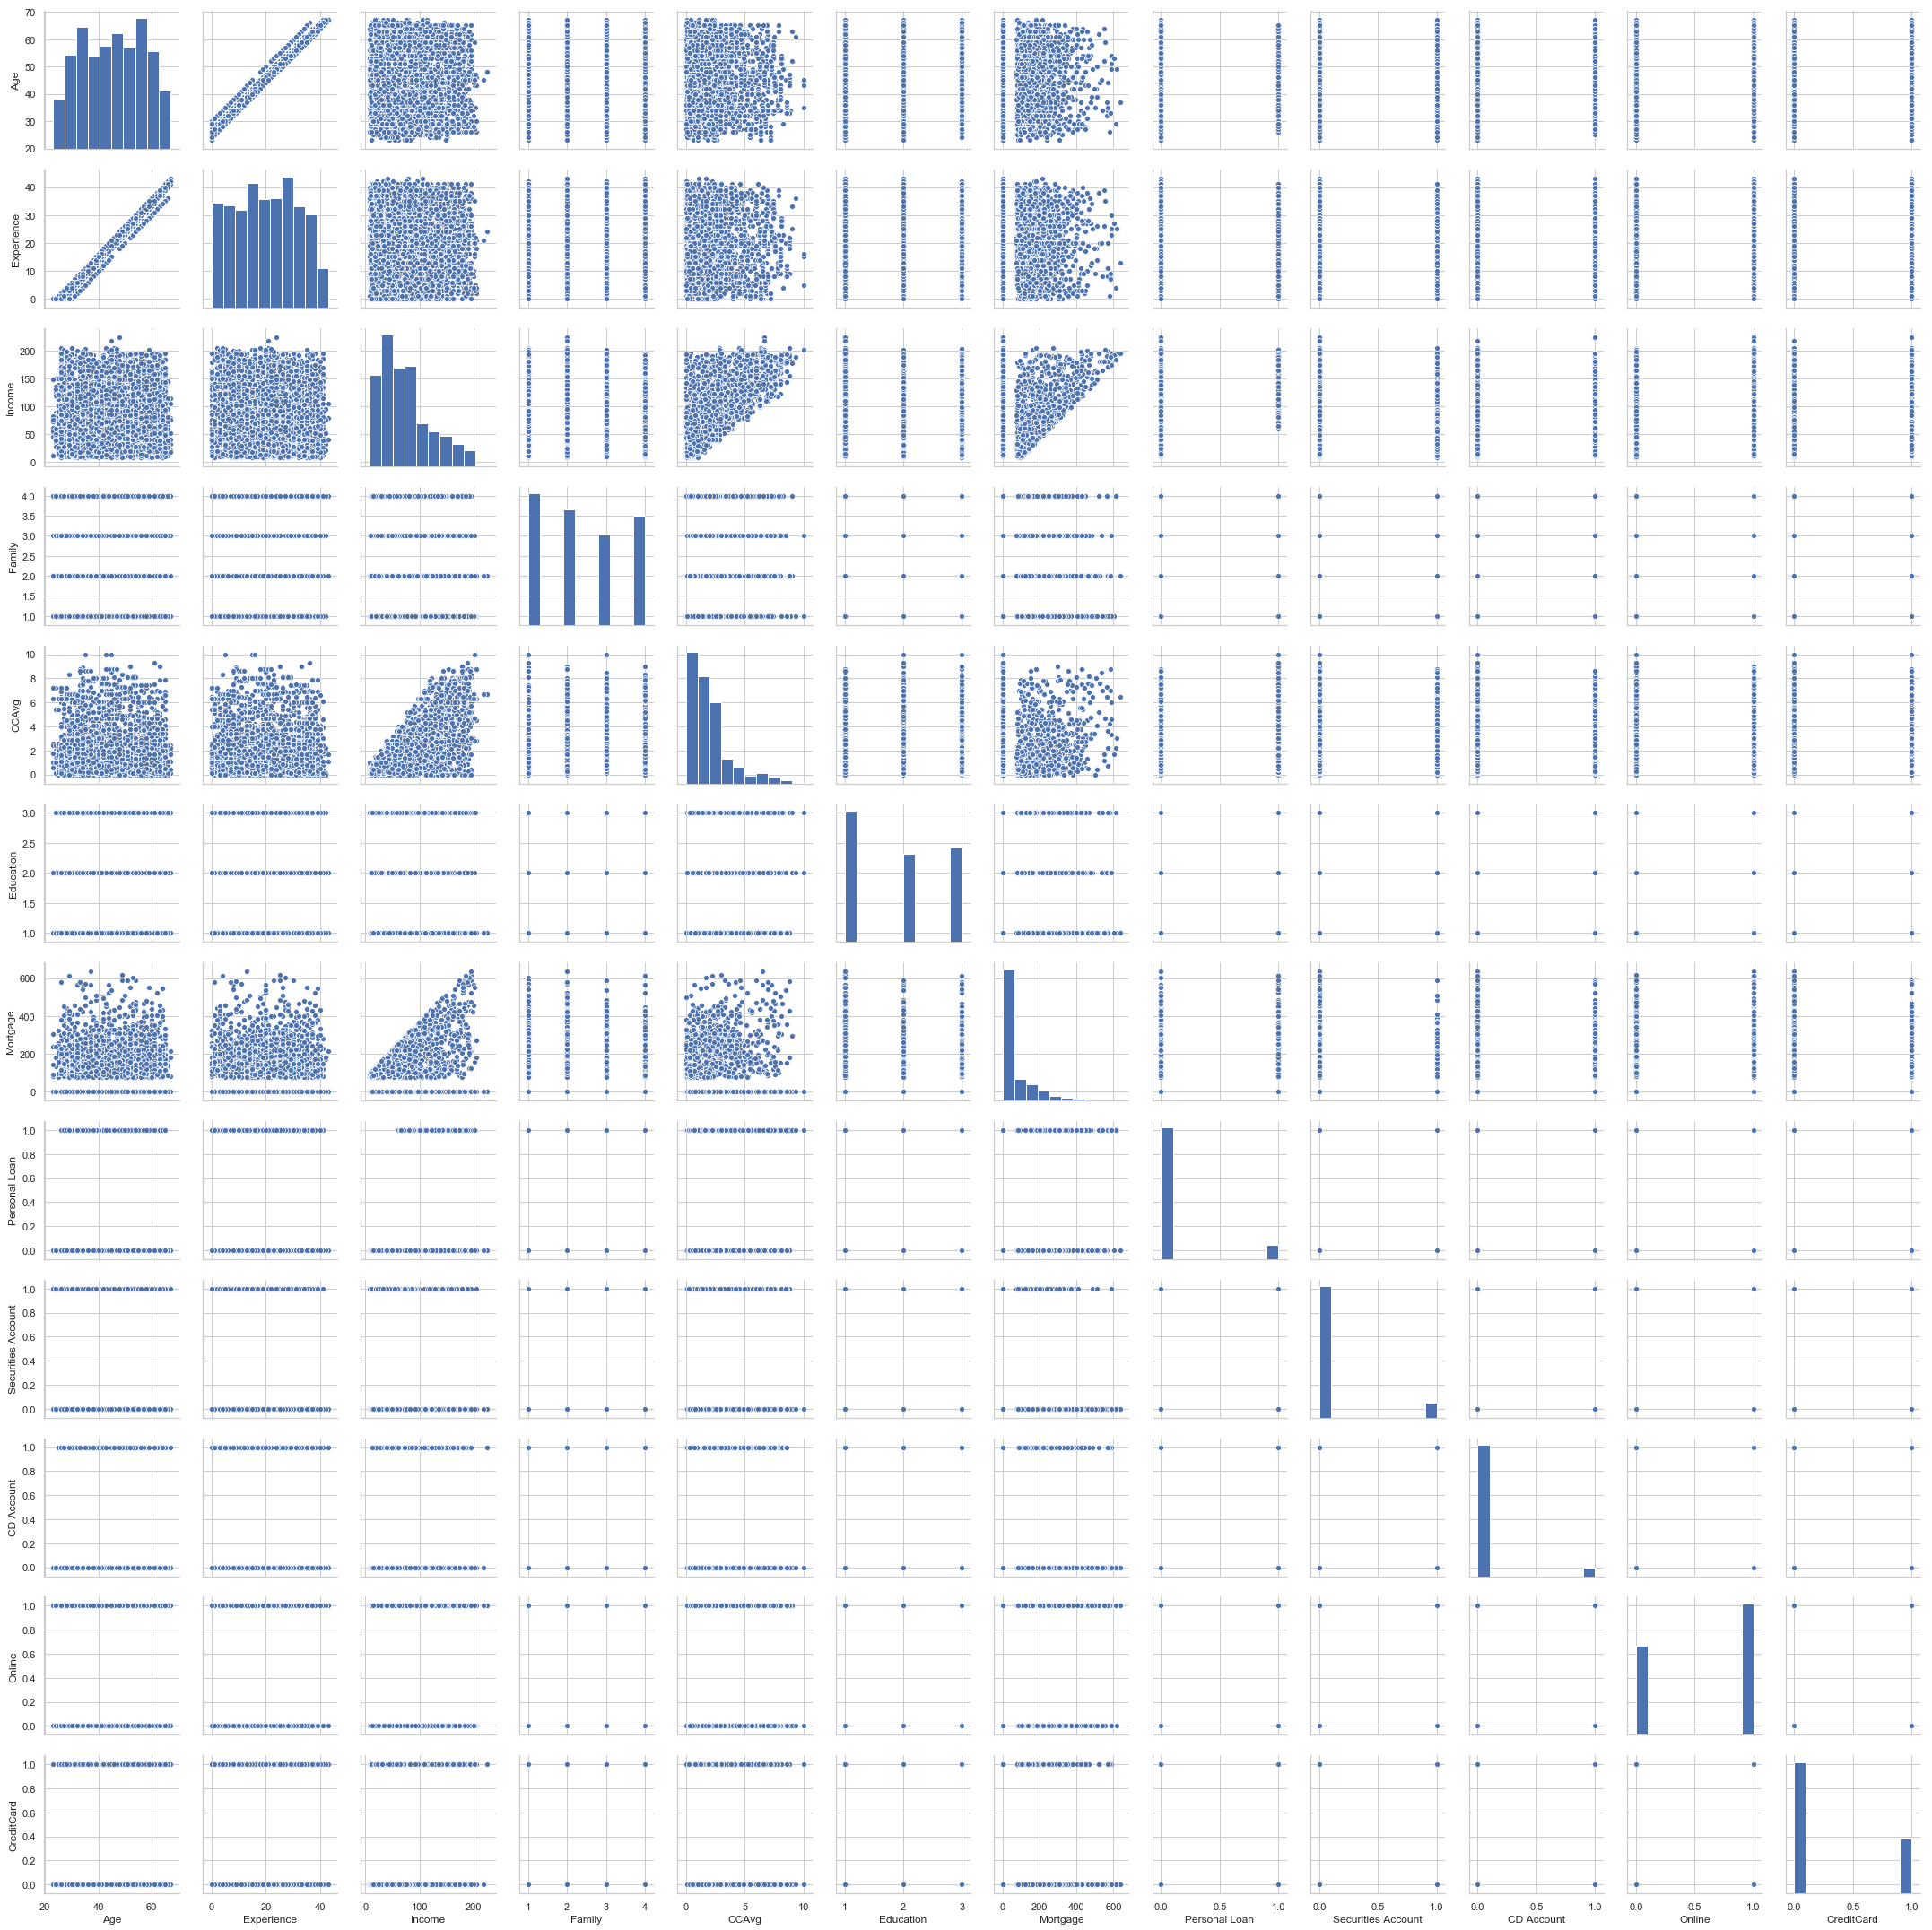

In [236]:
sns.pairplot(pl1[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']])

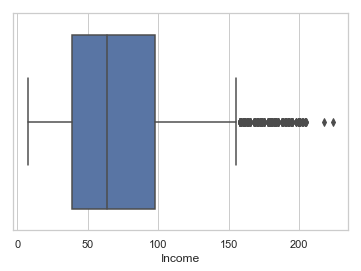

In [237]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=pl2["Income"],whis=1)

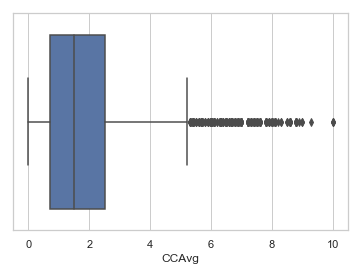

In [238]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=pl2["CCAvg"])

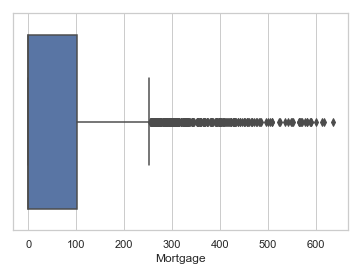

In [239]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=pl2["Mortgage"])

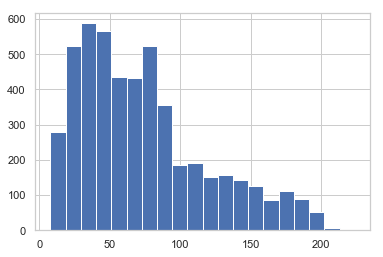

In [240]:
pl1['Income'].hist(bins=20)

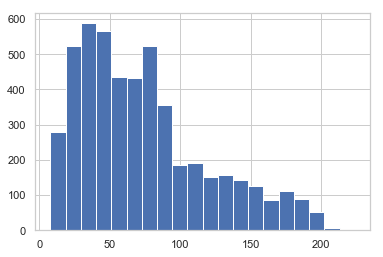

In [241]:
pl2['Income'].hist(bins=20)

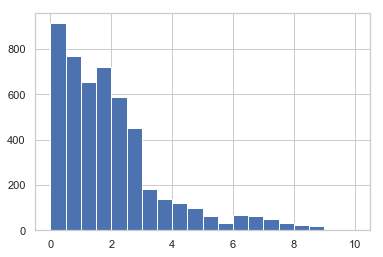

In [242]:
pl2['CCAvg'].hist(bins=20)

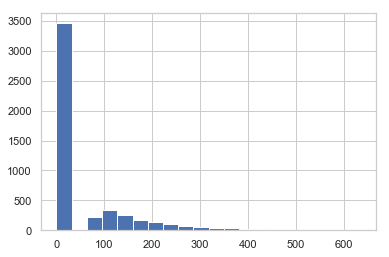

In [243]:
pl2['Mortgage'].hist(bins=20)

### Visually as well we can see that the income, ccavg and mortgage columns are not normal but rightly skewed. So in order to get the normal curve i tried with log, sqrt and cbrt function and stayed with cbrt function directly

In [244]:
pl2['Income_cb']=np.cbrt(pl2['Income'])

In [245]:
pl2['CCAvg_cb']=np.cbrt(pl2['CCAvg'])

In [246]:
pl2['Mortgage_cb']=np.cbrt(pl2['Mortgage'])

In [247]:
pl2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_cb,CCAvg_cb,Mortgage_cb
0,25,1,49,4,1.6,1,0,0,1,0,0,0,3.659306,1.169607,0.0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,3.239612,1.144714,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,2.223980,1.000000,0.0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,4.641589,1.392477,0.0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,3.556893,1.000000,0.0


### With cbrt function i got nearly normal curve for income and ccavg while with mortgage the problem still persists so decided to go ahead with the same

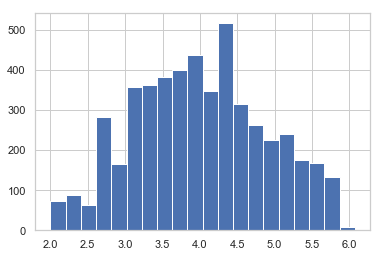

In [248]:
pl2['Income_cb'].hist(bins=20)

[Text(0.5, 0, '')]

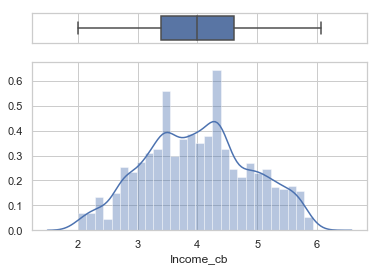

In [249]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(pl2["Income_cb"], ax=ax_box)
sns.distplot(pl2["Income_cb"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

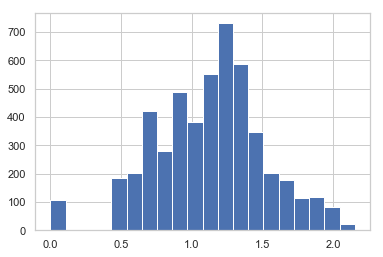

In [250]:
pl2['CCAvg_cb'].hist(bins=20)

[Text(0.5, 0, '')]

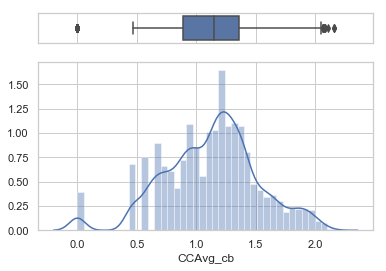

In [251]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(pl2["CCAvg_cb"], ax=ax_box)
sns.distplot(pl2["CCAvg_cb"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

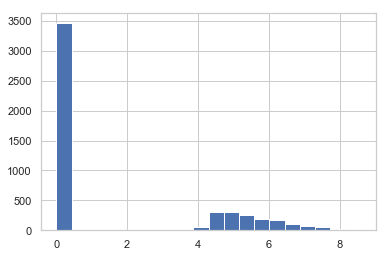

In [252]:
pl2['Mortgage_cb'].hist(bins=20)

[Text(0.5, 0, '')]

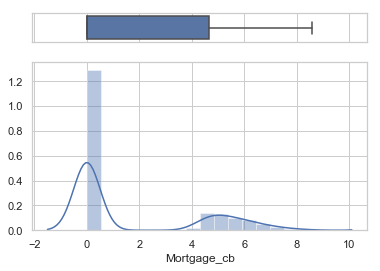

In [253]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(pl2["Mortgage_cb"], ax=ax_box)
sns.distplot(pl2["Mortgage_cb"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [254]:
pl2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_cb,CCAvg_cb,Mortgage_cb
0,25,1,49,4,1.6,1,0,0,1,0,0,0,3.659306,1.169607,0.0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,3.239612,1.144714,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,2.223980,1.000000,0.0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,4.641589,1.392477,0.0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,3.556893,1.000000,0.0


In [257]:
pl4=pl2.drop(['Income','CCAvg','Mortgage'],axis=1)

In [258]:
pl4.head()

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_cb,CCAvg_cb,Mortgage_cb
0,25,1,4,1,0,1,0,0,0,3.659306,1.169607,0.0
1,45,19,3,1,0,1,0,0,0,3.239612,1.144714,0.0
2,39,15,1,1,0,0,0,0,0,2.223980,1.000000,0.0
3,35,9,1,2,0,0,0,0,0,4.641589,1.392477,0.0
4,35,8,4,2,0,0,0,0,1,3.556893,1.000000,0.0


In [259]:
Q1 = pl4.quantile(0.25)
Q3 = pl4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                   20.000000
Experience            20.000000
Family                 2.000000
Education              2.000000
Personal Loan          0.000000
Securities Account     0.000000
CD Account             0.000000
Online                 1.000000
CreditCard             1.000000
Income_cb              1.219225
CCAvg_cb               0.469305
Mortgage_cb            4.657010
dtype: float64


In [260]:
pl4.shape

(5000, 12)

In [261]:
Q1 = pl4.quantile(0.25)
Q3 = pl4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Age                   20.000000
Experience            20.000000
Family                 2.000000
Education              2.000000
Personal Loan          0.000000
Securities Account     0.000000
CD Account             0.000000
Online                 1.000000
CreditCard             1.000000
Income_cb              1.219225
CCAvg_cb               0.469305
Mortgage_cb            4.657010
dtype: float64


In [262]:
print(pl4 < (Q1 - 1.5 * IQR)) 
(pl4 > (Q3 + 1.5 * IQR))

        Age  Experience  Family  Education  Personal Loan  Securities Account  \
0     False       False   False      False          False               False   
1     False       False   False      False          False               False   
2     False       False   False      False          False               False   
3     False       False   False      False          False               False   
4     False       False   False      False          False               False   
5     False       False   False      False          False               False   
6     False       False   False      False          False               False   
7     False       False   False      False          False               False   
8     False       False   False      False          False               False   
9     False       False   False      False          False               False   
10    False       False   False      False          False               False   
11    False       False   Fa

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_cb,CCAvg_cb,Mortgage_cb
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,True,False


In [263]:
pl4_out = pl4[~((pl4 < (Q1 - 1.5 * IQR)) |(pl4 > (Q3 + 1.5 * IQR))).any(axis=1)]
pl4_out.shape

(3892, 12)

In [264]:
pl3=pl4_out

In [265]:
pl3.shape

(3892, 12)

In [266]:
pl4.shape

(5000, 12)

### From the Describe, Pair plot and Boxplot we see that the assumption was correct and there are outliers in the Income, CCavg and mortgage columns and needs to be rectified.

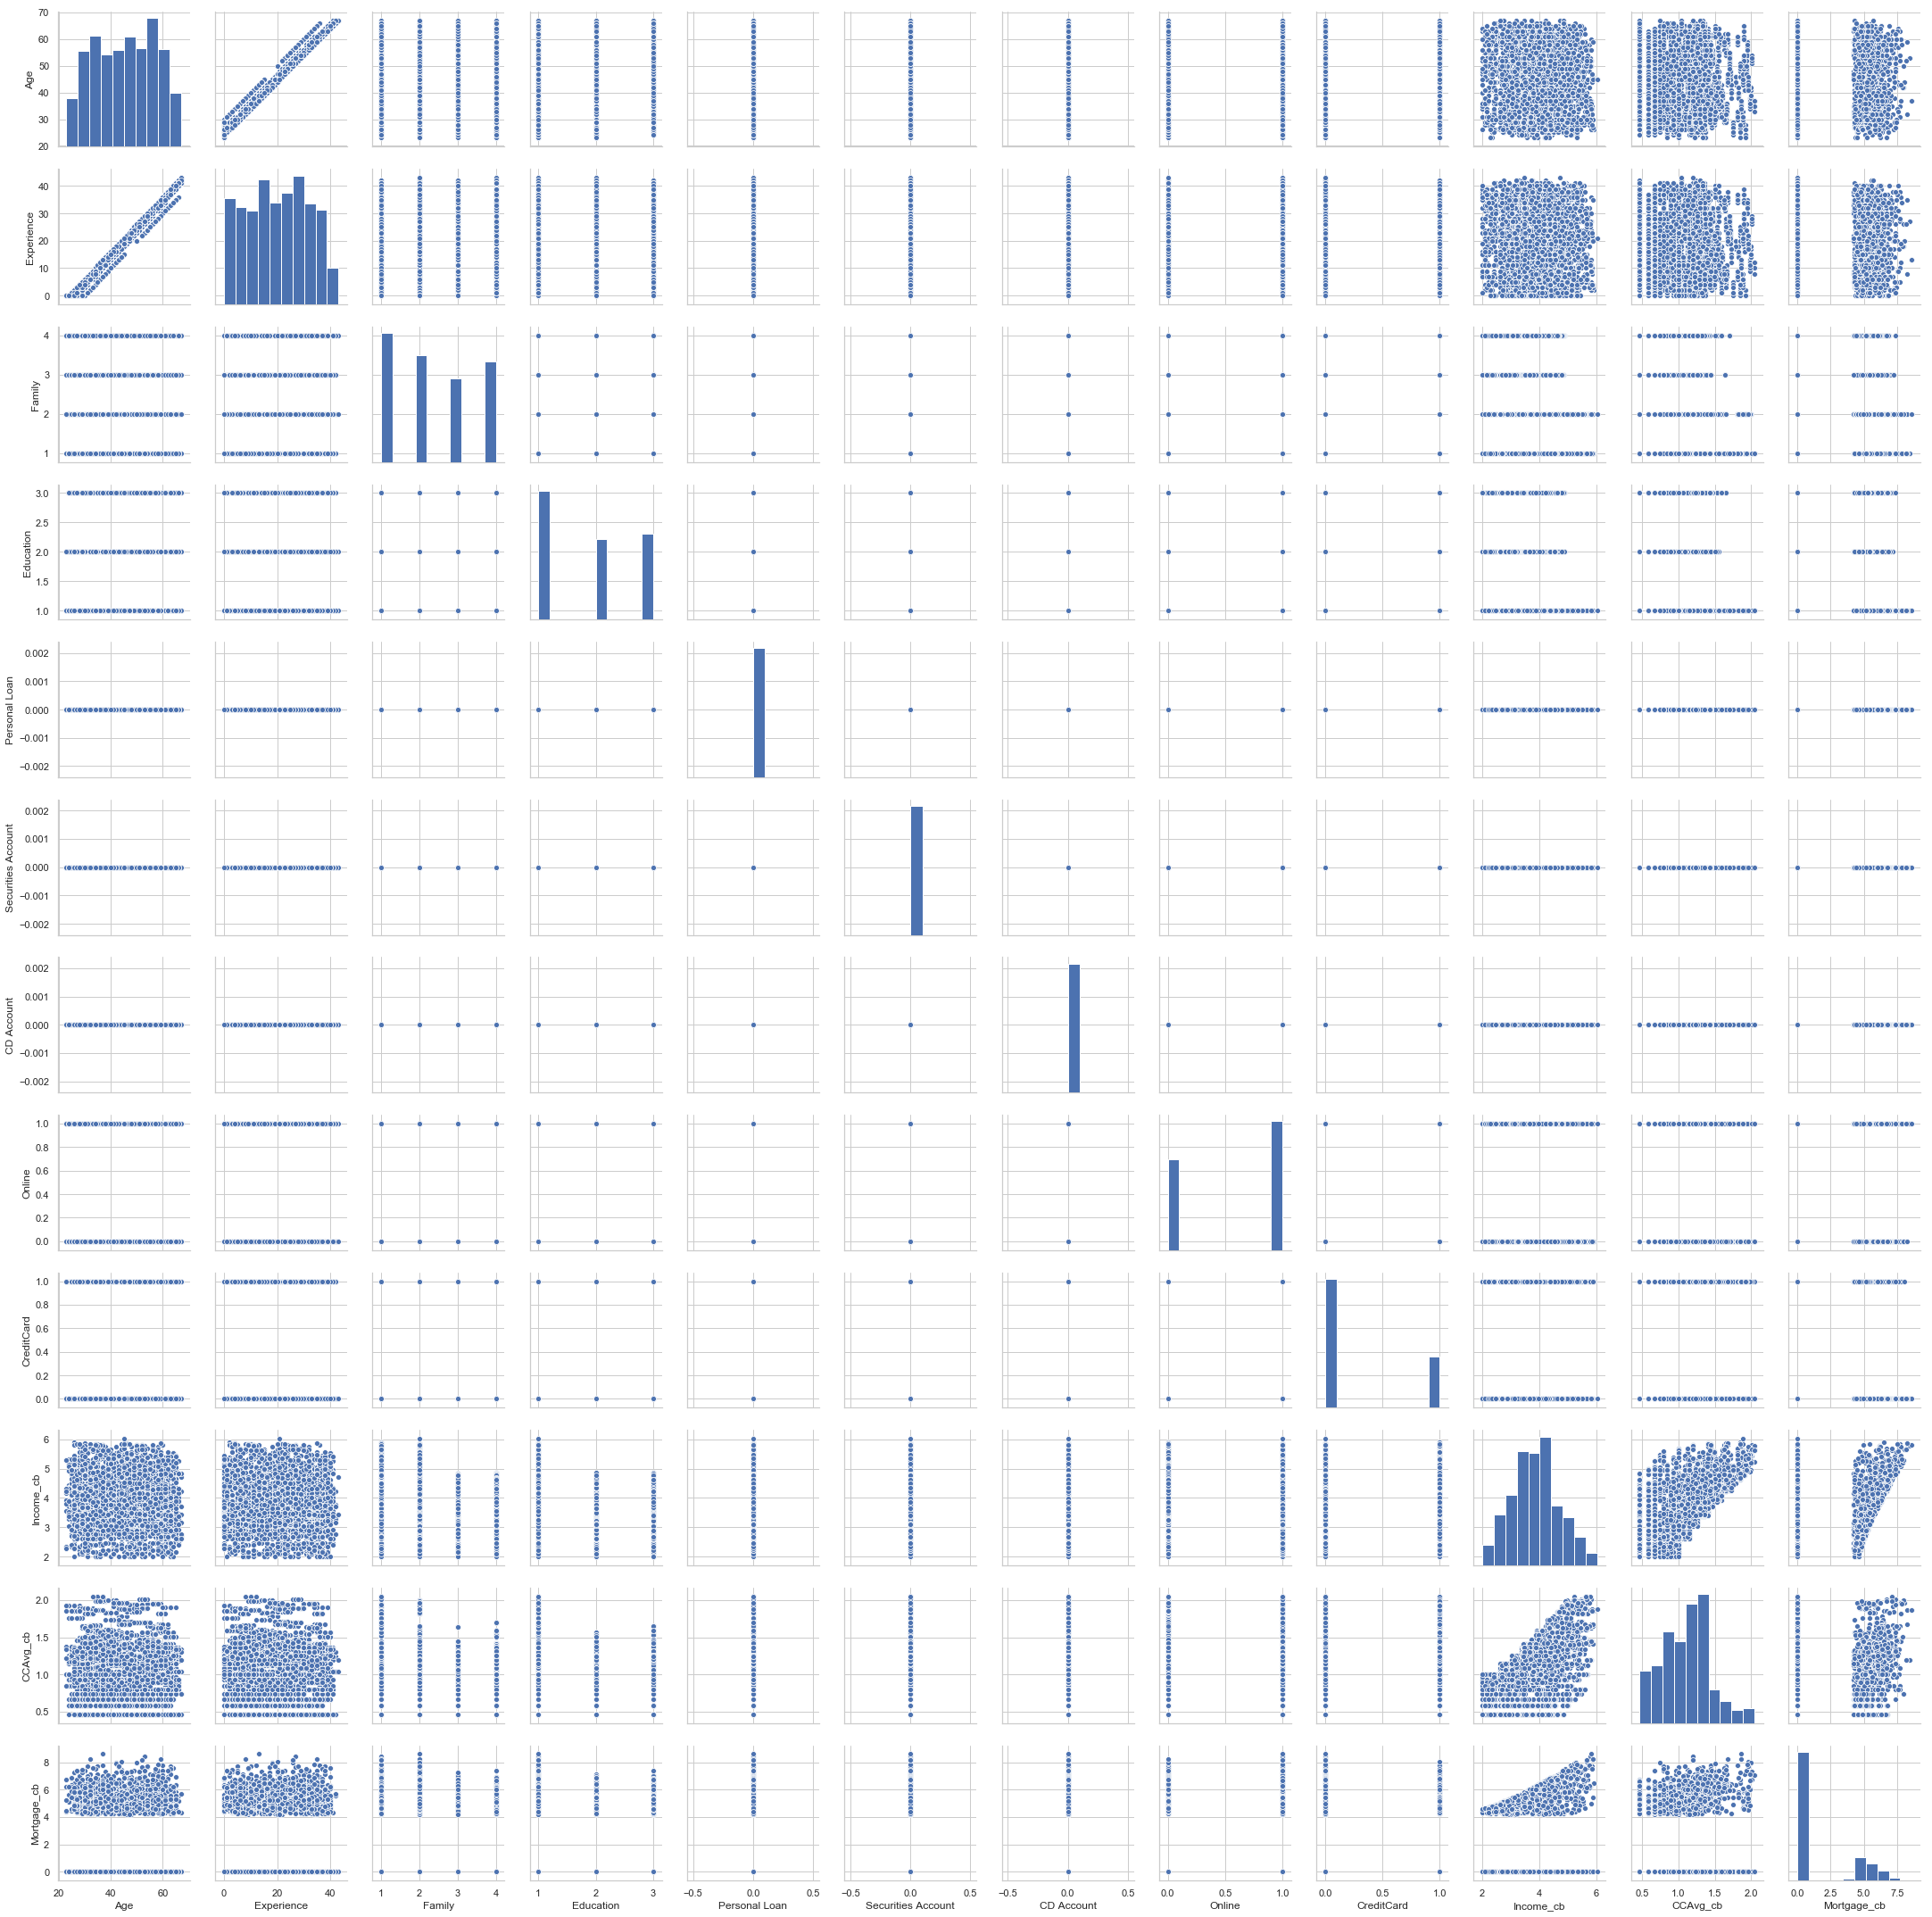

In [267]:
sns.pairplot(pl3[['Age','Experience','Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard','Income_cb','CCAvg_cb','Mortgage_cb']])

In [268]:
pl4["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [269]:
pl4.shape

(5000, 12)

### KNN Technique Starts Here


In [270]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [271]:
X_std = pd.DataFrame(StandardScaler().fit_transform(pl4))
X_std.columns = pl4.columns

C:\Users\Akash Barwad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Akash Barwad\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [272]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(pl4.iloc[:,1:13]) 
y = np.array(pl4['Personal Loan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [273]:
print(X_train.shape)
print(y_train.shape)

(4000, 11)
(4000,)


In [274]:
print(X_test.shape)
print(y_test.shape)

(1000, 11)
(1000,)


In [275]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.978
0.97
0.977
0.965


In [276]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [277]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


In [278]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.978
0.7727272727272727


### WIth KNN and kepping the final value of K=1 i got the accuracy of 97.8% with recall of 77.2%. Now lets go with other Techniques and check the acc score

### End of KNN

### Logistic Regression Starts Here



In [279]:
pl4 = pl4[['Age','Experience','Family','Education','Securities Account','CD Account','Online','CreditCard','Income_cb','CCAvg_cb','Mortgage_cb','Personal Loan']]

In [280]:
### In ABove line i have just sequenced the order of columns
pl4.head()

,Age,Experience,Family,Education,Securities Account,CD Account,Online,CreditCard,Income_cb,CCAvg_cb,Mortgage_cb,Personal Loan
0,25,1,4,1,1,0,0,0,3.659306,1.169607,0.0,0
1,45,19,3,1,1,0,0,0,3.239612,1.144714,0.0,0
2,39,15,1,1,0,0,0,0,2.223980,1.000000,0.0,0
3,35,9,1,2,0,0,0,0,4.641589,1.392477,0.0,0
4,35,8,4,2,0,0,0,1,3.556893,1.000000,0.0,0


In [311]:
array = pl4.values
X = array[:,0:10] # select all rows and first 10 columns which are the attributes
y = array[:,11]   # select all rows and the 11th column which is the classification "Yes", "No"
test_size = 0.30 # taking 70:30 training and test set
seed = 45 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [312]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9473333333333334
[[1323   15]
 [  64   98]]


C:\Users\Akash Barwad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### With Logistic Regression we get the Score of 94.7% 

### End of Log R

### Naive Baysed Start Here

In [313]:
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [314]:
X = pl4.values[:,0:10]  ## Features
Y = pl4.values[:,11]  ## Target

In [315]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [316]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [317]:
y_pred = clf.predict(X_test)

In [318]:
accuracy_score(y_test, y_pred, normalize = True)

0.892

### WIth Naive Baysed we got score of 89.2

### End of Naive Baysed 

In [322]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
features = np.array(pl4.iloc[:,1:10]) 
target = np.array(pl4['Personal Loan'])
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.30, random_state = 5)

In [323]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [324]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9571428571428572
0.9566666666666667


In [325]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[1342   56]
 [   9   93]]


In [326]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf


,Kernel,Accuracy
0,Linear,0.957143


In [327]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

C:\Users\Akash Barwad\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [328]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9702857142857143
0.9573333333333334


In [329]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.957143
0,RBF,0.970286


# Hence, we chose KNN as best technique for this database with the accuracy of 98%